In [1]:
import pandas as pd
from pandas import read_excel
import pandas_profiling
import numpy as np

df = pd.read_excel('academic.xlsx',dtype={'Gaming':int, 'Exercising':int, \
                    'Social media':int, 'Leisure':int, 'Sleeping':int,\
                    'Studying':float, 'Grade_percent':int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Gaming           50 non-null int64
Exercising       50 non-null int64
Social media     50 non-null int64
Leisure          50 non-null int64
Sleeping         50 non-null int64
Studying         50 non-null float64
Grade_percent    50 non-null int64
dtypes: float64(1), int64(6)
memory usage: 2.9 KB


In [2]:
#df = df[df.columns].as_type(int)
#df.head()
print(df.columns)
df.head()

Index(['Gaming', 'Exercising', 'Social media', 'Leisure', 'Sleeping',
       'Studying', 'Grade_percent'],
      dtype='object')


,Gaming,Exercising,Social media,Leisure,Sleeping,Studying,Grade_percent
0,40,10,6,56,49,0.0,34
1,56,3,10,69,56,0.0,35
2,5,3,18,26,51,2.0,67
3,18,7,30,55,49,9.0,82
4,10,10,7,27,45,5.0,67


In [3]:
# Feature engineering - create new variable Leisure by adding others 
df['Leisure'] = df['Gaming'] + df['Exercising'] + df['Social media']
df.head()

,Gaming,Exercising,Social media,Leisure,Sleeping,Studying,Grade_percent
0,40,10,6,56,49,0.0,34
1,56,3,10,69,56,0.0,35
2,5,3,18,26,51,2.0,67
3,18,7,30,55,49,9.0,82
4,10,10,7,27,45,5.0,67


## Correlation and Scatter plots

To look for any relationship or association between student grades and the other variable, we can do scatterplots of the sudent grades against different predictor variables.

How do we measure the degree of association or relationship between two numeric variablss? We need to calculate the **correlation**. 

https://www.simplypsychology.org/correlation.html#:~:text=Correlation%20means%20association%20%2D%20more%20precisely,negative%20correlation%2C%20and%20no%20correlation.&text=A%20zero%20correlation%20exists%20when%20there%20is%20no%20relationship%20between%20two%20variables.

Correlation Definitions, Examples & Interpretation
By Saul McLeod, updated 2020

Correlation means association - more precisely it is **a measure of the extent to which two variables are related**. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

## Positive correlation
A positive correlation is a relationship between two variables in which both variables **move in the same direction**. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases. An example of positive correlation would be height and weight. Taller people tend to be heavier.

## Negative correlation
A negative correlation is a relationship between two variables in which the variables **move in the opposite direction**. Therefore, an increase in one variable is associated with a decrease in the other. An example of negative correlation would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).

A zero correlation exists when there is no relationship between two variables. For example there is no relationship between the amount of tea drunk and level of intelligence.

## Scattergrams
A correlation can be expressed visually. This is done by drawing a scattergram (also known as a scatterplot, scatter graph, scatter chart, or scatter diagram).

A scattergram is a graphical display that shows the relationships or associations between two numerical variables (or co-variables), which are represented as points (or dots) for each pair of score.

A scattergraph indicates the strength and direction of the correlation between the co-variables.

When you draw a scattergram it doesn't matter which variable goes on the x-axis and which goes on the y-axis.

Remember, in correlations we are always dealing with paired scores, so the values of the 2 variables taken together will be used to make the diagram.

Decide which variable goes on each axis and then simply put a cross at the point where the 2 values coincide.

Some uses of Correlations

1. Prediction

If there is a relationship between two variables, we can make predictions about one from another.

2. Validity

Concurrent validity (correlation between a new measure and an established measure).

3. Reliability

Test-retest reliability (are measures consistent).
Inter-rater reliability (are observers consistent).
Theory verification

Predictive validity.
Correlation Coefficients: Determining Correlation Strength
Instead of drawing a scattergram a correlation can be expressed numerically as a coefficient, ranging from -1 to +1. When working with continuous variables, the correlation coefficient to use is Pearson’s r.


In [4]:
# Calculating Correlation between variables - use the corr() method of series
#  Variable_1.corr(Variable_2)

print("\n",\
    df['Grade_percent'].corr(df['Leisure'], method='pearson'))

print("\n",\
    df['Leisure'].corr(df['Grade_percent'], method='pearson'))

print("\n",\
    df['Grade_percent'].corr(df['Sleeping'], method='pearson'))

print("\n",\
    df['Grade_percent'].corr(df['Social media'], method='pearson'))

print("\n",\
    df['Grade_percent'].corr(df['Gaming'], method='pearson'))

print("\n",\
    df['Grade_percent'].corr(df['Exercising'], method='pearson'))

print("\n",\
    df['Grade_percent'].corr(df['Studying'], method='pearson'))


 0.007965482526478228

 0.00796548252647823

 0.15287882988565574

 0.20128310606064817

 -0.21097539065597148

 -0.1585434910379235

 0.6650065430645031


In [5]:
# we can calculate all correlation in one go using the corr() method on entire dataframe
#  df.corr()

relationship = df.corr(method='pearson', min_periods=1)
relationship

,Gaming,Exercising,Social media,Leisure,Sleeping,Studying,Grade_percent
Gaming,1.000000,-0.063085,-0.240651,0.439416,0.041156,-0.172453,-0.210975
Exercising,-0.063085,1.000000,-0.174480,0.031664,0.039967,-0.159870,-0.158543
Social media,-0.240651,-0.174480,1.000000,0.736078,0.262362,0.093194,0.201283
Leisure,0.439416,0.031664,0.736078,1.000000,0.284641,-0.067899,0.007965
Sleeping,0.041156,0.039967,0.262362,0.284641,1.000000,-0.046945,0.152879
Studying,-0.172453,-0.159870,0.093194,-0.067899,-0.046945,1.000000,0.665007
Grade_percent,-0.210975,-0.158543,0.201283,0.007965,0.152879,0.665007,1.000000


In [6]:
# We can use pandas styling to color code +ve and -ve correlations
def color_corr(value):
  """
  Color all positive correlation RED 
        all negative correlation BLUE,
        equal to ZERO BLACK
  https://matplotlib.org/3.1.0/gallery/color/named_colors.html
  """
  if value > 0.5:
    color = 'purple'
  elif value > 0.0:
    color = 'red'
  elif value < 0:
    color = 'blue'
  elif value < -0.5:
    color = 'cyan'
  else:
    color = 'black'
  return 'color: %s' % color


#relationship= relationship.drop(['Gaming', 'Exercising', 'Social_media', 'Leisure', 'Sleeping','Studying'])
relationship.style.applymap(color_corr,subset=relationship.columns)

,Gaming,Exercising,Social media,Leisure,Sleeping,Studying,Grade_percent
Gaming,1,-0.063085,-0.240651,0.439416,0.0411559,-0.172453,-0.210975
Exercising,-0.063085,1,-0.17448,0.031664,0.0399669,-0.15987,-0.158543
Social media,-0.240651,-0.17448,1,0.736078,0.262362,0.0931938,0.201283
Leisure,0.439416,0.031664,0.736078,1,0.284641,-0.0678987,0.00796548
Sleeping,0.0411559,0.0399669,0.262362,0.284641,1,-0.0469445,0.152879
Studying,-0.172453,-0.15987,0.0931938,-0.0678987,-0.0469445,1,0.665007
Grade_percent,-0.210975,-0.158543,0.201283,0.00796548,0.152879,0.665007,1


In [7]:
# Narrow down and look only at correlation between Grades and the other variables
round(relationship[['Grade_percent']],2).style.applymap(color_corr)

,Grade_percent
Gaming,-0.21
Exercising,-0.16
Social media,0.2
Leisure,0.01
Sleeping,0.15
Studying,0.67
Grade_percent,1


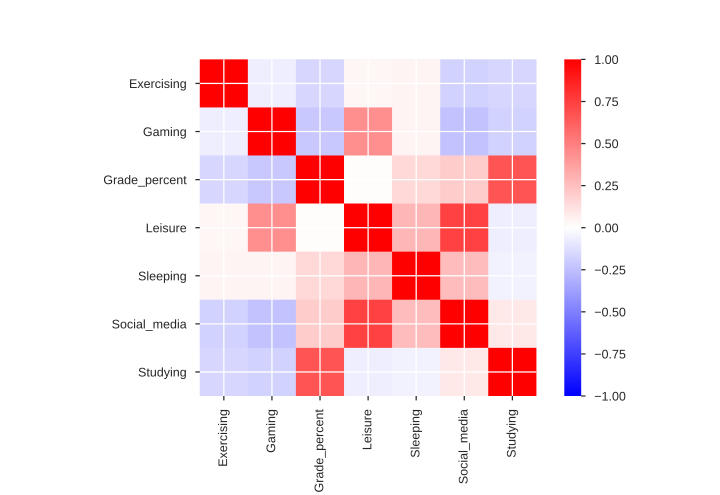

In [8]:
# Another visual way to look at correlatin -using heatmap plots done by pandas_profiling
# pandas_profiling.ProfileReport(df)
# takes a long time - image insrted here from earlier run
from IPython.display import Image
Image(filename='/home/bou/Downloads/yr11_digital_solution/maths_yr12/Scatter_Relationship_Grades_Studying.png')

We can see from above that there is a very strong positive correlation or relatioship between Studying varible and Grades (67%). So more hours spent studying leads to better grades. THis makes sense.

The next strongest is between Grades and Gaming (21%) but this is a negative correlation - that is as one spends mre hours gaming, there is a correspponding decrese in grades. This result is also expected.

Now we see there is alos a positive correlation between Grades and amount of time spent Gaming , about 20%. Its is not a very strong relationship but is sigificant and we need to do some further study to find out why playing video games leads to better grades. Possibly the games are techical and teach useful acdemic concepts!!

To look at these relationhsips visually - we can do scatter plots


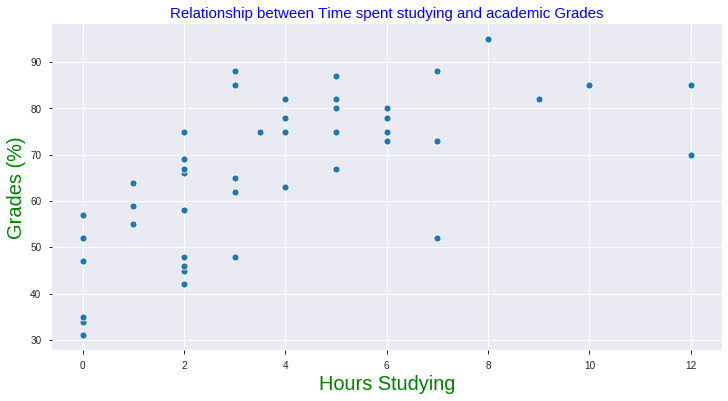

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(1, 1, figsize=(12,6))
# sns.relplot(x="Studying", y="Grade_percent", data=df,ax=ax)
sns.scatterplot(x="Studying", y="Grade_percent", data=df,ax=ax)

title = "Relationship between Time spent studying and academic Grades"
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Grades (%)', color='g', fontsize=20)
ax.set_xlabel('Hours Studying', color='g', fontsize=20)
plt.show()


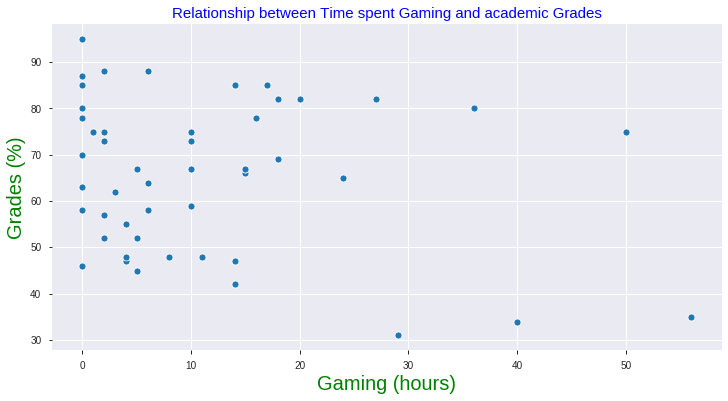

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# sns.relplot(x="Studying", y="Grade_percent", data=df,ax=ax)
sns.scatterplot(x="Gaming", y="Grade_percent", data=df,ax=ax)

title = "Relationship between Time spent Gaming and academic Grades"
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Grades (%)', color='g', fontsize=20)
ax.set_xlabel('Gaming (hours)', color='g', fontsize=20)
plt.show()

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

## Linear regression

Linear regression is a statistical model that examines the linear relationship between two (**Simple Linear Regression** ) or more (**Multiple Linear Regression**) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:

a linear relationship can be positive (independent variable goes up, dependent variable goes up) or negative (independent variable goes up, dependent variable goes down)

A relationship between variables Y and X is represented by this equation:


```Y`i = mX + b```

In this equation, Y is the dependent variable — or the variable we are trying to predict or estimate; X is the independent variable — the variable we are using to make predictions; m is the slope of the regression line — it represent the effect X has on Y. In other words, if X increases by 1 unit, Y will increase by exactly m units. (“Full disclosure”: this is true only if we know that X and Y have a linear relationship. In almost all linear regression cases, this will not be true!) b is a constant, also known as the Y-intercept. If X equals 0, Y would be equal to b.

Simple Linear Regression (SLR). In a SLR model, we build a model based on data — the slope and Y-intercept derive from the data; furthermore, we don’t need the relationship between X and Y to be exactly linear. SLR models also include the errors in the data (also known as residuals). I won’t go too much into it now, maybe in a later post, but residuals are basically the differences between the true value of Y and the predicted/estimated value of Y. It is important to note that in a linear regression, we are trying to predict a continuous variable. In a regression model, we are trying to minimize these errors by finding the “line of best fit” — the regression line from the errors would be minimal.

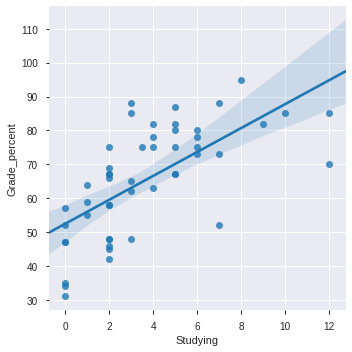

In [11]:
'''lmplot() - Plot data and regression model fits across a FacetGrid.

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.
'''

#fig, ax = plt.subplots(1, 1, figsize=(12,6))
g=sns.lmplot(x="Studying", y="Grade_percent", data=df)
title = "Relationship between Time spent studying and academic Grades"
#ax.set_title(title, color='b',fontsize=15)
#ax.set_ylabel('Grades (%)', color='g', fontsize=20)
#ax.set_xlabel('Hours Studying', color='g', fontsize=20)

Text(0.5, 0, 'Time Studying (hours)')

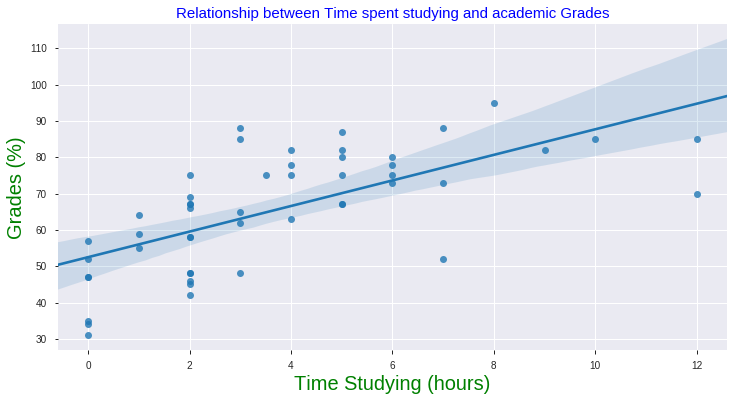

In [12]:
# Plot data and a linear regression model fit.

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = sns.regplot(x="Studying", y="Grade_percent", data=df)
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Grades (%)', color='g', fontsize=20)
ax.set_xlabel('Time Studying (hours)', color='g', fontsize=20)
# the linear model i y = 3x + 50

```
Above line through the scatter plot is called LINE of BEST FIT - linear regression model
For the above we can use the data to see that the equation of the straight line is 
Y = 3.5X + 52

Residual is just difference between actual y values (actual grades) and the grades predicted by the linear model above. Model is just an approximation - we can never have a perfect model - there will always be error in the predictions and the residual is bit like the error - how far the model is off. 

```

In [13]:
df['predicted_grade'] = df['Studying']*3.5 + 52
df['residual'] = df['Grade_percent'] - df['predicted_grade']
df[['Grade_percent','predicted_grade','residual']].head(10)

,Grade_percent,predicted_grade,residual
0,34,52.0,-18.0
1,35,52.0,-17.0
2,67,59.0,8.0
3,82,83.5,-1.5
4,67,69.5,-2.5
5,69,59.0,10.0
6,82,66.0,16.0
7,64,55.5,8.5
8,80,73.0,7.0
9,66,59.0,7.0


Text(0.5, 0, 'Time Studying (hours)')

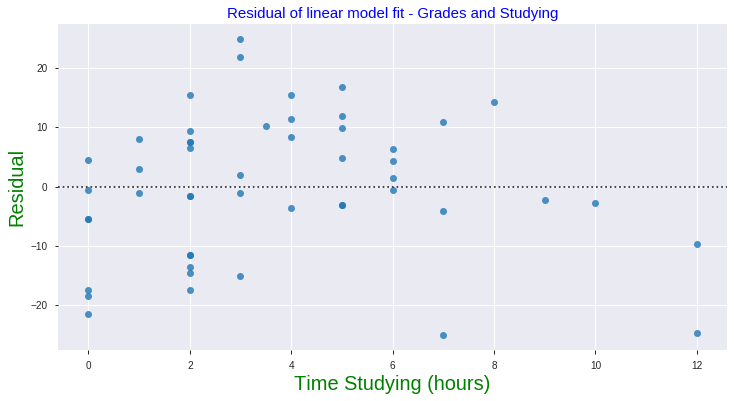

In [14]:
# seaborn library has function residualplot() that can plot the residual when we fit a liner model to some data. Here we use a linear model to approximate the relationship between hours spent sutdying and grade achived and the resulting error or residual is ploted below

# Plot the residuals of a linear regression.
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = sns.residplot(x="Studying", y="Grade_percent", data=df)
ax.set_title("Residual of linear model fit - Grades and Studying", color='b',fontsize=15)
ax.set_ylabel('Residual', color='g', fontsize=20)
ax.set_xlabel('Time Studying (hours)', color='g', fontsize=20)

In [15]:
df.head()

,Gaming,Exercising,Social media,Leisure,Sleeping,Studying,Grade_percent,predicted_grade,residual
0,40,10,6,56,49,0.0,34,52.0,-18.0
1,56,3,10,69,56,0.0,35,52.0,-17.0
2,5,3,18,26,51,2.0,67,59.0,8.0
3,18,7,30,55,49,9.0,82,83.5,-1.5
4,10,10,7,27,45,5.0,67,69.5,-2.5


## Linear Regression in Statsmodels
Statsmodels is “a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

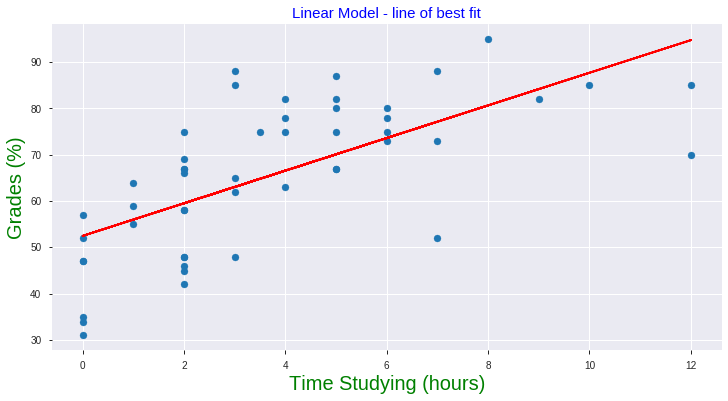

In [16]:
# sns.pairplot(df)
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 5].values.reshape(-1, 1)  # Studying values converts it into a numpy array
Y = df.iloc[:, 6].values.reshape(-1, 1)  # Response - Grades 
# reshape(x,y) (-1,1) means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()   # create object for the class
linear_regressor.fit(X, Y)              # perform linear regression
Y_pred = linear_regressor.predict(X)    # make predictions

fig, ax = plt.subplots(1, 1, figsize=(12,6))

plt.scatter(X, Y)     # plot data Grades against studying
plt.plot(X, Y_pred, color='red')  # Plot line - linear model 

ax.set_title("Linear Model - line of best fit", color='b',fontsize=15)
ax.set_ylabel('Grades (%)', color='g', fontsize=20)
ax.set_xlabel('Time Studying (hours)', color='g', fontsize=20)
plt.show()

In [17]:
import statsmodels.api as sm

X=df['Studying']      ## X usually means our input variables (or independent variables)
y=df['Grade_percent'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add a Y intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)  # make the predictions by the model

# Print out the statistics
model.summary()

/home/bou/py37/lib64/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Grade_percent   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     38.06
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.38e-07
Time:                        09:46:42   Log-Likelihood:                -194.25
No. Observations:                  50   AIC:                             392.5
Df Residuals:                      48   BIC:                             396.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4920      2.734     19.202      0.000      46.996      57.988
Studying       3.5221      0.571      6.169      0.000       2.374       4.670
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.986
Skew:                          -0.248   Prob(JB):                        0.611
Kurtosis:                       2.524   Cond. No.                         7.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ordinary Least Squares
OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line. 


```
Y`i = mX + b
```

```
Y`i = 3.5221X + 52.492
```

-  **slope/gradient of the Studying predictor 3.5221** . The coefficient of 3.5221 means that as the Studying variable (num of hours spent studying) increases by 1, the predicted value of Grades increases by 3.5221%. 

- **y-intercept at 52.492**   (when we study for 0 hours, we still get grade of 52%!!!)

- **R-squared 0.442**  - the percentage of variance our model explains; meaning that this model explains 44.2% of the variance in our dependent variable

- **the standard error SE=0.571** (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); 

the t scores and p-values, for hypothesis test — the Studying has statistically significant p-value; there is a 95% confidence intervals for the Studying regression coefficinet (2.374 to	4.670) 
(meaning we predict at a 95% percent confidence that the value of Studying is between 2.374 to	4.670).

Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

## Linear Regression in sklearn

In [18]:
df.head()  # 1st 5 rows in data

,Gaming,Exercising,Social media,Leisure,Sleeping,Studying,Grade_percent,predicted_grade,residual
0,40,10,6,56,49,0.0,34,52.0,-18.0
1,56,3,10,69,56,0.0,35,52.0,-17.0
2,5,3,18,26,51,2.0,67,59.0,8.0
3,18,7,30,55,49,9.0,82,83.5,-1.5
4,10,10,7,27,45,5.0,67,69.5,-2.5


In [19]:
from sklearn import linear_model
'''
So now, as before, we have the data frame that contains the independent variables 
 (marked as “df”) and the data frame with the dependent variable (marked as “target”).
 Let’s fit a regression model using SKLearn. First we’ll define our X and y — 
 this time I’ll use all the variables in the data frame to predict the housing price:
 '''
X = df[['Studying']]  # X is features/variables (independent variables)

y = df['Grade_percent']  # y is respone (dependent variable)

# fit a model:
lm = linear_model.LinearRegression()

# The lm.fit() function fits a linear model. 
model = lm.fit(X,y)

# We want to use the model to make predictions - use lm.predict():
predictions = np.round(lm.predict(X),1)

# compare grades predicted by our linear model  and actual grades in our original data
list(zip(predictions,y))[:10]


[(52.5, 34),
 (52.5, 35),
 (59.5, 67),
 (84.2, 82),
 (70.1, 67),
 (59.5, 69),
 (66.6, 82),
 (56.0, 64),
 (73.6, 80),
 (59.5, 66)]

In [20]:
# R² score of our model - this the percentage of explained variance of the predictions
lm.score(X,y)

0.44223370231860093

In [21]:
# Y intercept   52.5
lm.intercept_

52.49196050775741

In [22]:
# linear model coeficient   3.5
lm.coef_[0]

3.522143864598024

In [23]:
df.columns

Index(['Gaming', 'Exercising', 'Social media', 'Leisure', 'Sleeping',
       'Studying', 'Grade_percent', 'predicted_grade', 'residual'],
      dtype='object')

In [24]:
round(relationship[['Grade_percent']],2).style.applymap(color_corr)

,Grade_percent
Gaming,-0.21
Exercising,-0.16
Social media,0.2
Leisure,0.01
Sleeping,0.15
Studying,0.67
Grade_percent,1


## Finding equation of best fit line manually

see https://realpython.com/numpy-scipy-pandas-correlation-python/
To find the slope or gradient of line we need
1. Find r - Pearson correlation coefficient for x and y
2. Sample standard deviation and means of x and y
3. gradient of line of best fit is  **slope = r * (std_y/std_x)**
4. y intercept is **intercept = mean_y  - (b * mean_x)**

In [25]:
x=df['Studying']       # independent or explanatory variable
y=df['Grade_percent']  # dependent or response variable

# using pandas methods corr()
r = df['Grade_percent'].corr(df['Studying'], method='pearson')

# using numpy function corrcoef()
r = np.corrcoef(x, y)[0,1]  # gives a 2x2 matrix - we just pick one of diagonal entry
r

0.6650065430645031

In [26]:
'''
In NumPy, we can compute the mean, standard deviation, and variance of a given array 
along the second axis by two approaches first is by using inbuilt functions 

Method 1: Using numpy.mean(), numpy.std(), numpy.var()
'''
mean_x = np.mean(x)
std_x = np.sqrt( np.mean((x - np.mean(x)) ** 2) )  # or simply np.std(x) 


mean_y = np.mean(y)
std_y = np.sqrt( np.mean((y - np.mean(y)) ** 2) )  # np.std(y)

print(f'Sample Mean of explanatory variable Studying {mean_x}\n\
Sample Mean of response variable Grade       {mean_y}\n\
Standard Deviation of explanatory variable Studying  {std_x}\n\
Standard Deviation of explanatory variable Grades   {std_y}')

Sample Mean of explanatory variable Studying 3.75
Sample Mean of response variable Grade       65.7
Standard Deviation of explanatory variable Studying  2.9769951293208394
Standard Deviation of explanatory variable Grades   15.767371372552878


In [28]:
# the slope or gradient 
slope = r * (std_y/std_x)

# the y intercept
intercept = mean_y  - (slope * mean_x)

print(f'Equation of best fit line (regression) is \n\n\
y = {intercept:0.2f} + {slope:0.2f}x')


Equation of best fit line (regression) is 

y = 52.49 + 3.52x


In [29]:
# check with scipy
# get the slope and the intercept of the regression line, as well as the correlation coefficient, with linregress()
import scipy
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y = {intercept:.2f} + {slope:.2f}x, r = {r:.2f}'
line

'Regression line: y = 52.49 + 3.52x, r = 0.67'

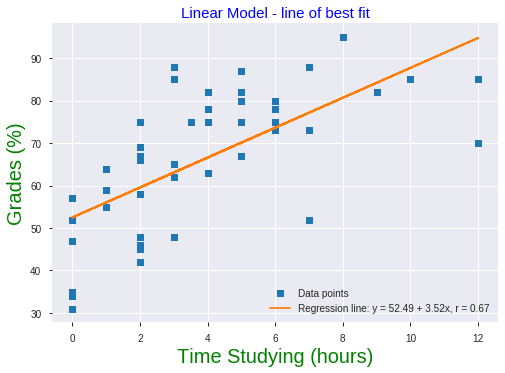

In [30]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)

ax.set_title("Linear Model - line of best fit", color='b',fontsize=15)
ax.set_ylabel('Grades (%)', color='g', fontsize=20)
ax.set_xlabel('Time Studying (hours)', color='g', fontsize=20)
ax.legend(facecolor='white')
plt.show()

In [31]:
df.columns
dat = df[['Grade_percent','Gaming', 'Studying']].values
print(dat.shape)
dat[:2]    # see first 2 rows of matrix

(50, 3)


array([[34., 40.,  0.],
       [35., 56.,  0.]])

In [32]:
# https://www.w3resource.com/numpy/manipulation/reshape.php
dat = np.reshape(dat, [3,50])
dat[:2]            

array([[34., 40.,  0., 35., 56.,  0., 67.,  5.,  2., 82., 18.,  9., 67.,
        10.,  5., 69., 18.,  2., 82., 27.,  4., 64.,  6.,  1., 80.,  0.,
         6., 66., 15.,  2., 63.,  0.,  4., 67., 15.,  2., 48.,  8.,  3.,
        70.,  0., 12., 57.,  2.,  0., 52.,  2.,  0., 47., 14.],
       [ 0., 85.,  0., 10., 75.,  1.,  2., 78.,  0.,  6., 75., 50.,  5.,
        59., 10.,  1., 47.,  4.,  0., 73.,  2.,  7., 58.,  0.,  2., 62.,
         3.,  3., 48., 11.,  2., 78., 16.,  4., 31., 29.,  0., 73., 10.,
         6., 75., 10.,  6., 52.,  5.,  7., 45.,  5.,  2., 75.]])

In [33]:
# correlation does not look right !!
corr_matrix = np.corrcoef(dat).round(decimals=2)
corr_matrix

array([[ 1.  , -0.34, -0.5 ],
       [-0.34,  1.  , -0.42],
       [-0.5 , -0.42,  1.  ]])

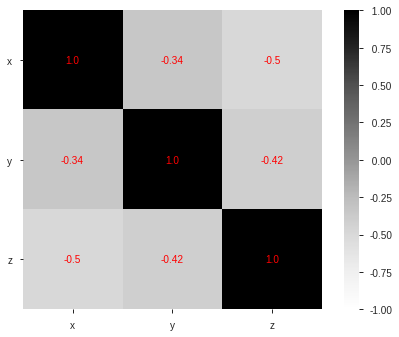

In [34]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [35]:
'''
Lets use more than important features - ones with greater correlation 

we drop Sleeping, Exercise and Leisure as correlation less than or equal to 16%
'''

X=df[['Gaming', 'Social media', 'Studying']]
## X is our input variables (or independent variables)

y=df['Grade_percent'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## add a Y intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)  # make the predictions by the model

# Print out the statistics
model.summary()

/home/bou/py37/lib64/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Grade_percent   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     13.40
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           2.05e-06
Time:                        09:47:06   Log-Likelihood:                -193.14
No. Observations:                  50   AIC:                             394.3
Df Residuals:                      46   BIC:                             401.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           51.6088      4.038     12.781      0.000      43.481      59.737
Gaming          -0.0868      0.139     -0.627      0.534      -0.366       0.192
Social media     0.1111      0.099      1.121      0.268      -0.088       0.311
Studying         3.3963      0.580      5.856      0.000       2.229       4.564
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.434
Skew:                          -0.173   Prob(JB):                        0.805
Kurtosis:                       2.703   Cond. No.                         68.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""